# Polynomial Regression

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
from google.colab import files
uploaded = files.upload()

dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

Saving Position_Salaries.csv to Position_Salaries.csv


In [4]:
print(dataset)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


## Training the Linear Regression model on the whole dataset

In [5]:
# Simple linear regression model

# here we dont split the data into training and test datasets,as data is small nd for getting much good prediction,we train the models on complete dataset

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Training the Polynomial Regression model on the whole dataset

In [10]:
# first we create matrix of powered features,ie x1,x1^2,...x1^n
# final polynomial regressor will be combination of these matrix of powered features (x_poly) and the linear coefficients

from sklearn.preprocessing import PolynomialFeatures
poly_reg= PolynomialFeatures(degree = 4)
x_poly = poly_reg.fit_transform(X)                                          # fit_transform here is used to transform the linear feature x1 into x1^2,x1^3...

# here we gonna create new model as polynomial model,but by using linear regressor as it is linear combination of powered matrix of features we formed and coeff(linear format)
lin_reg_2 =LinearRegression() 
lin_reg_2.fit(x_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Visualising the Linear Regression results

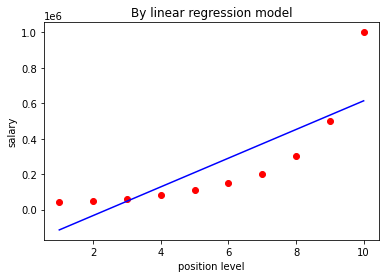

In [7]:
plt.scatter(X,y,color = 'red')
plt.plot(X,lin_reg.predict(X),color = 'blue')           # here we gonna plot regressor line,so X cordinate is feature and y cordinate = lin_reg model predicted on feature X to get pred salary
plt.title('By linear regression model')
plt.xlabel('position level')
plt.ylabel('salary')
plt.show()

# as we see these model is not well adapted for given dataset(nonlinear dataset),not reliable

## Visualising the Polynomial Regression results

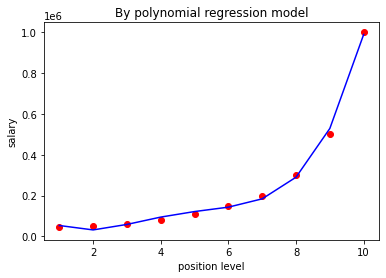

In [11]:
plt.scatter(X,y,color = 'red')
plt.plot(X,lin_reg_2.predict(x_poly),color = 'blue')
plt.title('By polynomial regression model')
plt.xlabel('position level')
plt.ylabel('salary')
plt.show()

# here we get much reliable results by using x power is 4

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

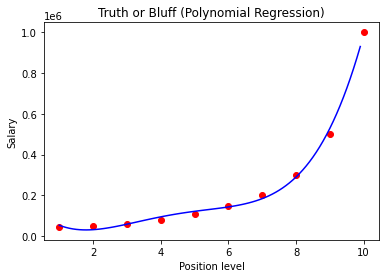

In [12]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Predicting a new result with Linear Regression

In [13]:
# here we want to predict the salary of level 6.5 (between level 6 and 7) as his actual salary is about 160000

lin_reg.predict([[6.5]])          # two sqaure brackets = first represents the first dimension ie rows and another brackets represents coloumn

array([330378.78787879])

## Predicting a new result with Polynomial Regression

In [15]:
# by polymial model we get good prediction

lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

# so we get prediction near as actual value ie 160000

array([158862.45265155])